<a href="https://colab.research.google.com/github/s2ul2/book_tenchor-s_Pytorch_DL/blob/main/%E3%80%8AChap3_%ED%85%90%EC%B4%88%EC%9D%98_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%8A%B9%EA%B0%95%E3%80%8B_ex3_3_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 손글씨 데이터 살펴보기

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

60000
10000


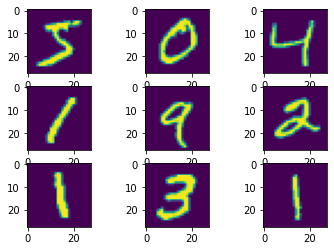

In [1]:
import matplotlib.pyplot as plt

from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

# ❶ 학습용 데이터와 평가용 데이터 분리
training_data = MNIST(root="./", train=True, download=True, transform=ToTensor())
test_data = MNIST(root="./", train=False, download=True, transform=ToTensor())

print(len(training_data)) # 학습에 사용할 데이터 개수
print(len(test_data))     # 평가에 사용할 데이터 개수

for i in range(9): # 샘플 이미지를 9개 출력
   plt.subplot(3, 3, i+1)
   plt.imshow(training_data.data[i])
plt.show()

# 학습 데이터와 평가 데이터의 데이터로더 정의

In [2]:
from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(training_data, batch_size=32, shuffle=True)

# ❶평가용은 데이터를 섞을 필요가 없음
test_loader = DataLoader(test_data, batch_size=32, shuffle=False) 

# 손글씨 분류 모델 학습하기

In [ ]:
import torch
import torch.nn as nn

from torch.optim.adam import Adam

device = "cuda" if torch.cuda.is_available() else "cpu" # ❶ 학습에 사용할 프로세서를 지정

model = nn.Sequential(
   nn.Linear(784, 64),
   nn.ReLU(),
   nn.Linear(64, 64),
   nn.ReLU(),
   nn.Linear(64, 10)
)
model.to(device) # 모델의 파라미터를 GPU로 보냄

lr = 1e-3
optim = Adam(model.parameters(), lr=lr)

for epoch in range(20):
   for data, label in train_loader:
       # 가중치 0으로 초기화
       optim.zero_grad()
       # ❷ 입력 데이터를 모델의 입력에 맞게 모양을 변환
       data = torch.reshape(data, (-1, 784)).to(device)
       preds = model(data)

       loss = nn.CrossEntropyLoss()(preds, label.to(device)) # ❸ 손실 계산
       loss.backward()
       optim.step()

   print(f"epoch{epoch+1} loss:{loss.item()}")

torch.save(model.state_dict(), "MNIST.pth") # ➍ 모델을 MNIST.pth라는 이름으로 저장

epoch1 loss:0.15866723656654358
epoch2 loss:0.03169103339314461
epoch3 loss:0.23107518255710602
epoch4 loss:0.072252057492733
epoch5 loss:0.010426606982946396
epoch6 loss:0.09083937853574753
epoch7 loss:0.122793048620224
epoch8 loss:0.058326080441474915
epoch9 loss:0.23796728253364563
epoch10 loss:0.03712591901421547
epoch11 loss:0.056015778332948685
epoch12 loss:0.030777379870414734
epoch13 loss:0.03086451254785061
epoch14 loss:0.0014302351046353579
epoch15 loss:0.00026212874217890203
epoch16 loss:0.00853375531733036
epoch17 loss:0.0006858294364064932
epoch18 loss:0.001773029682226479
epoch19 loss:0.000247726624365896
epoch20 loss:0.06840351969003677


# 모델의 성능 평가

In [ ]:
# ❶ 모델 가중치 불러오기
model.load_state_dict(torch.load("MNIST.pth", map_location=device))

num_corr = 0 # 분류에 성공한 전체 개수

with torch.no_grad(): # ❷ 기울기를 계산하지 않음
   for data, label in test_loader:
       data = torch.reshape(data, (-1, 784)).to(device)

       output = model(data.to(device))
       preds = output.data.max(1)[1] # ❸ 모델의 예측값 계산
       # ❹ 올바르게 분류한 개수
       corr = preds.eq(label.to(device).data).sum().item()
       num_corr += corr

   print(f"Accuracy:{num_corr/len(test_data)}") # 분류 정확도를 출력합니다.

Accuracy:0.9734
